In [2]:
from datetime import date

#se sefiene el intervalo de busqueda desde el 2004 hasta el momentio en que se ejecute este código
today = date.today()
Intervalo = ("2010-01-01 "+ str(today))

#importa los paquetes
from pytrends.request import TrendReq
import pandas as pd
from tqdm import tqdm
import time
import statsmodels.api as sm
import numpy as np


#Paises = ['AR','BR','CL','MX','DO','SV','PA','UY','CO','PE'] # todos los países
Paises= ['DO', 'AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'EC', 'SV', 'GT', 'HN', 'MX', 'PY', 'PE', 'PA', 'UY', 'VE', 'IL'] #Paises con EMBI
#Paises = ['HT','DO'] # solo Haití y Dominicana

#buscar por el tema:
"""pytrends = TrendReq(hl='es', tz=360)
suggs = pytrends.suggestions("manifestación")
print(suggs)"""
#Query por a realizar
Query = ["/m/06k1r"]


frames = list()

#pytrends = TrendReq(hl='en-US', tz=360)
pytrends = TrendReq(hl='en-US', tz=360,   retries=2, backoff_factor=0.1, requests_args={'verify':False})


j = 0

#Se itera entre los países
for i in tqdm(Paises):
    
    #se hace el query
    pytrends.build_payload(Query, timeframe= Intervalo, geo= str(i)) #se construye el query
    data = pytrends.interest_over_time() # se extrae la linea de tiempo (interest_over_time) del query

    ####data = data.rename(columns={"/g/120ry1nd": 'protestas + manifestaciones'})
    data = data.reset_index()
    #Se normaliza
    #data[str(Query[0])] = data[str(Query[0])].div(Normalizacion[int(j)]) # Para paises sura
    data[str(Query[0])] = data[str(Query[0])].div(1) # Paises sin normalizacion

    # se apilan los resultados en una lista
    frames.append(data)  
    j = j+1
    
    time.sleep(30)
    
#se concatena las lista de resultados en un solo resultado    
result = pd.concat(frames, keys= Paises)
result = result.reset_index()
result.rename(columns={'level_0': 'Pais'}, inplace=True)


#Se hace el procesamiento y el filtro HP
lamnda = 60 #venta de filtro hp

resultados = list()
for i in Paises:
    data = result[result['Pais'] == str(i)] #el data no es el 
    Dataref = data.copy()
    #se reemplaza los 0 para no generar error con el log
    Dataref['log'] = data[str(Query[0])].replace(0, 0.01)
    #Se saca el logaritmo natural
    Dataref['log'] = np.log(Dataref['log'])
    #Se aplica el filtro
    Dataref['cycle'], Dataref['trend'] = sm.tsa.filters.hpfilter(Dataref['log'], lamnda)
    
    # se asigna el nivel de riesgo social
    
    #se puede comentar desde acá 
    
    """estado = []
    for i in Dataref['trend']:
        if i > 1.4:
            if i > 2:
                nivelriesgo = "Muy Alto"
            else:
                nivelriesgo = "Alto"
        else:
            nivelriesgo = "Bajo" 
        estado.append(nivelriesgo)
    Dataref['Estado del riesgo'] = estado"""
    #se puede comentar hasta acá 
    
    resultados.append(Dataref) 
    
    
Final = pd.concat(resultados, keys= Paises)


try:
    Final = Final.reset_index()
except:
    pass
Final.to_csv('TermometroRsocial.csv')

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
  0%|                                                                                           | 0/18 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthed

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
 61%|██████████████████████████████████████████████████                                | 11/18 [05:38<03:34, 30.69s/it]C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthed

# Real Estate

In [2]:
import os
os.getcwd()
import sys
sys.path.append('C:\\Users\\daniguvz\\OneDrive - Seguros Suramericana, S.A\\Documents\\GitHub\\pytrends')

In [3]:
from datetime import date

#se sefiene el intervalo de busqueda desde el 2004 hasta el momentio en que se ejecute este código
today = date.today()
Intervalo = ("2010-01-01 "+ str(today))

#importa los paquetes
from pytrends.request import TrendReq
import pandas as pd
from tqdm import tqdm
import time
import statsmodels.api as sm
import numpy as np

In [4]:
#buscar por el tema:
pytrends = TrendReq(hl='en', tz=360)
suggs = pytrends.suggestions("Real Estate")
print(suggs)

[{'mid': '/m/06k1r', 'title': 'Real Estate', 'type': 'Topic'}, {'mid': '/m/028sgq', 'title': 'Real Estate Broker', 'type': 'Occupation'}, {'mid': '/m/01hlwv', 'title': 'JPMorgan Chase & Co', 'type': 'Financial services company'}, {'mid': '/m/080_1g', 'title': 'Century 21 Real Estate', 'type': 'Real estate company'}, {'mid': '/m/0837mt', 'title': 'RE/MAX', 'type': 'Real estate company'}]


In [5]:
#Paises = ['AR','BR','CL','MX','DO','SV','PA','UY','CO','PE'] # todos los países
#Paises= ['DO', 'AR', 'BO', 'BR', 'CL', 'CO', 'CR', 'EC', 'SV', 'GT', 'HN', 'MX', 'PY', 'PE', 'PA', 'UY', 'VE', 'IL'] #Paises con EMBI
#Paises = ['HT','DO'] # solo Haití y Dominicana

Paises= ['US', 'AR', 'BR', 'CL', 'CO', 'MX', 'PA']


#Query por a realizar
Query = ["/m/06k1r"]


frames = list()

#pytrends = TrendReq(hl='en-US', tz=360)
pytrends = TrendReq(hl='en-US', tz=360,   retries=2, backoff_factor=0.1, requests_args={'verify':False})

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [6]:
j = 0
#Se itera entre los países
for i in tqdm(Paises):
    
    #se hace el query
    pytrends.build_payload(Query, timeframe= Intervalo, geo= str(i)) #se construye el query
    data = pytrends.interest_over_time() # se extrae la linea de tiempo (interest_over_time) del query
    data = data.reset_index()
    data[str(Query[0])] = data[str(Query[0])].div(1) # Paises sin normalizacion

    # se apilan los resultados en una lista
    frames.append(data)  
    j = j+1
    
    time.sleep(30)


  0%|          | 0/7 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
 14%|█▍        | 1/7 [00:31<03:08, 31.41s/it]C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#

In [9]:
#se concatena las lista de resultados en un solo resultado    
result = pd.concat(frames, keys= Paises)
result = result.reset_index()
result.rename(columns={'level_0': 'Pais'}, inplace=True)

In [10]:
#Se hace el procesamiento y el filtro HP
lamnda = 60 #venta de filtro hp

resultados = list()
for i in Paises:
    data = result[result['Pais'] == str(i)] #el data no es el 
    Dataref = data.copy()
    #se reemplaza los 0 para no generar error con el log
    Dataref['log'] = data[str(Query[0])].replace(0, 0.01)
    #Se saca el logaritmo natural
    Dataref['log'] = np.log(Dataref['log'])
    #Se aplica el filtro
    Dataref['cycle'], Dataref['trend'] = sm.tsa.filters.hpfilter(Dataref['log'], lamnda)
    
    # se asigna el nivel de riesgo social
    
    #se puede comentar desde acá 
    
    """estado = []
    for i in Dataref['trend']:
        if i > 1.4:
            if i > 2:
                nivelriesgo = "Muy Alto"
            else:
                nivelriesgo = "Alto"
        else:
            nivelriesgo = "Bajo" 
        estado.append(nivelriesgo)
    Dataref['Estado del riesgo'] = estado"""
    #se puede comentar hasta acá 
    
    resultados.append(Dataref) 
    
    
Final = pd.concat(resultados, keys= Paises)


try:
    Final = Final.reset_index()
except:
    pass
Final.to_csv('RealEstate.csv')

In [20]:
Final.drop(columns = ['level_1', 'level_0'], inplace = True)
#Final.reset_index(inplace = True)
Final

,Pais,date,/m/06k1r,isPartial,log,cycle,trend
0,US,2010-01-01,100.0,False,4.605170,-0.013152,4.618323
1,US,2010-02-01,94.0,False,4.543295,-0.041531,4.584826
2,US,2010-03-01,97.0,False,4.574711,0.023602,4.551109
3,US,2010-04-01,96.0,False,4.564348,0.048086,4.516263
4,US,2010-05-01,92.0,False,4.521789,0.042021,4.479767
...,...,...,...,...,...,...,...
1108,PA,2022-11-01,29.0,False,3.367296,-0.097527,3.464823
1109,PA,2022-12-01,30.0,False,3.401197,-0.077234,3.478431
1110,PA,2023-01-01,34.0,False,3.526361,0.029108,3.497252
1111,PA,2023-02-01,38.0,False,3.637586,0.119022,3.518564


In [23]:
co = Final[Final['Pais'] == 'CO']

<AxesSubplot:xlabel='date', ylabel='trend'>

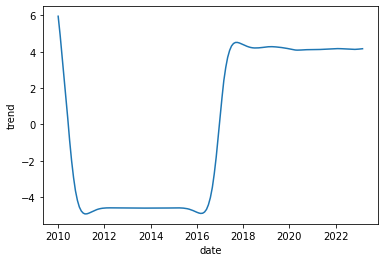

In [25]:
sns.lineplot(data = co, x='date', y='trend')

<AxesSubplot:xlabel='date', ylabel='trend'>

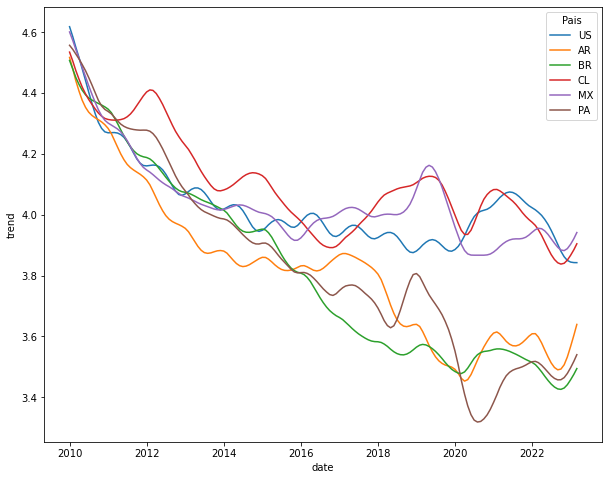

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.lineplot(data = Final[Final['Pais']!='CO'], x='date', y='trend', hue='Pais')